## import library and load data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Flight Price Prediction/Clean_Dataset.csv")
df = df.drop(columns=['Unnamed: 0'])
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


## Exploratory Data Analysis - EDA

In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


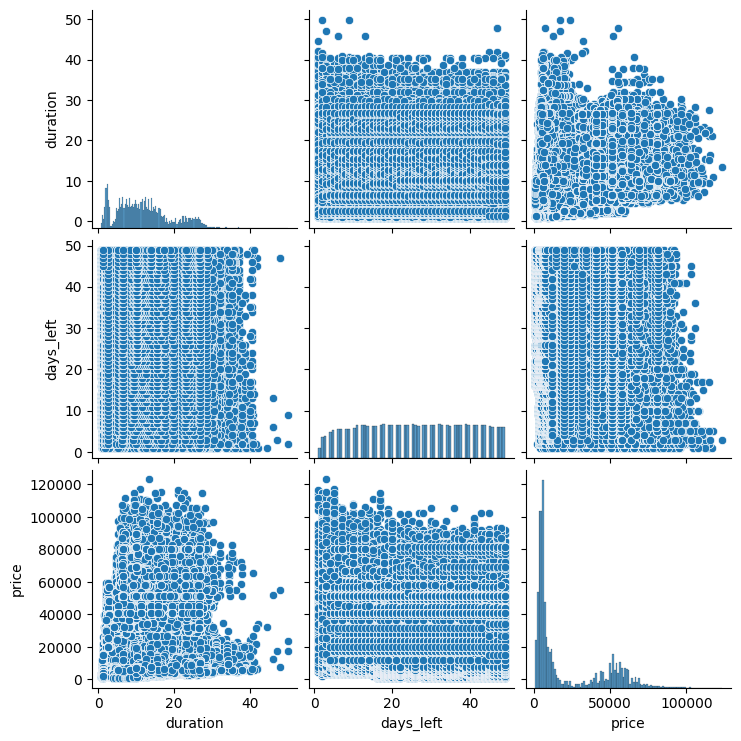

In [8]:
sns.pairplot(df)

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


<BarContainer object of 6 artists>

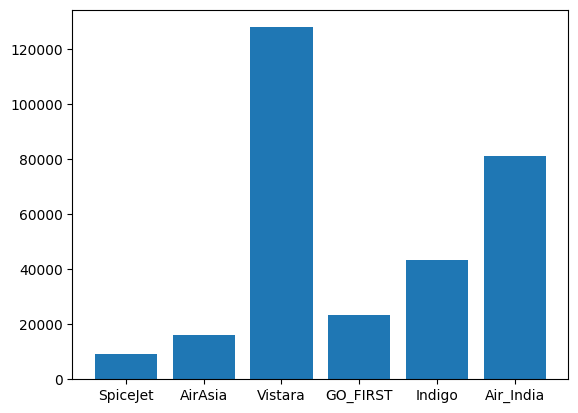

In [9]:
print(df["airline"].unique())
SpiceJet = sum(df['airline'] == "SpiceJet")
AirAsia = sum(df["airline"] == "AirAsia")
Vistara = sum(df["airline"] == "Vistara")
GO_FIRST = sum(df["airline"] == "GO_FIRST")
Indigo = sum(df["airline"] == "Indigo")
Air_India = sum(df["airline"] == "Air_India")
plt.bar(['SpiceJet' , 'AirAsia' , 'Vistara' , 'GO_FIRST' , 'Indigo' , 'Air_India'] , [SpiceJet , AirAsia , Vistara , GO_FIRST , Indigo , Air_India])

In [10]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

## Prepare Data

In [12]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='price')
y = df['price']

x = x.to_numpy()
y = y.to_numpy()

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(240122, 10)
(240122,)
(60031, 10)
(60031,)


In [13]:
columns = df.drop(columns='price').columns
trian_df = pd.DataFrame(train_X, columns=columns)
test_df = pd.DataFrame(test_X, columns=columns)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [15]:
numerical = ["duration" , "days_left"]
category = [i for i in columns if i not in numerical ]
num_df = trian_df[numerical].astype(float)
cat_df = trian_df[category]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

std = StandardScaler()
num_df = std.fit_transform(num_df)

In [17]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cat_df = oe.fit_transform(cat_df)

In [18]:
train_df = np.concatenate([cat_df, num_df], axis=1)

In [19]:
y.shape

(300153,)

In [20]:
num_df = test_df[numerical].astype(float)
cat_df = test_df[category]
num_df = std.transform(num_df)
cat_df = oe.transform(cat_df)
test_df = np.concatenate([cat_df, num_df], axis=1)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_df, train_y)

LinearRegression()

In [22]:
lr.predict(train_df)

array([ 9251.292519  ,  5592.34010145, 48233.67112843, ...,
        6409.68674064,  5318.74160123,  8025.88368719])

In [23]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(train_y, lr.predict(train_df))

np.float64(7008.892322065616)

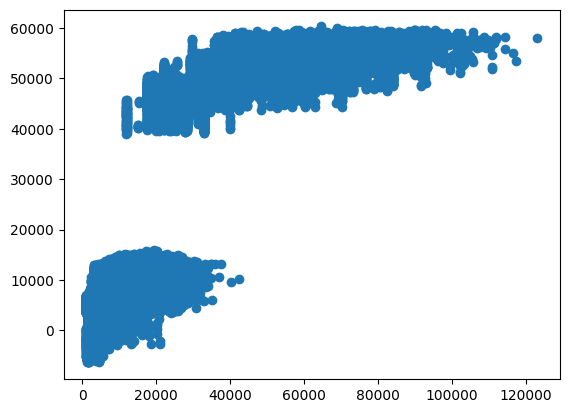

In [24]:
plt.scatter(train_y, lr.predict(train_df))

In [25]:
root_mean_squared_error(test_y, lr.predict(test_df))

np.float64(7013.560554781587)

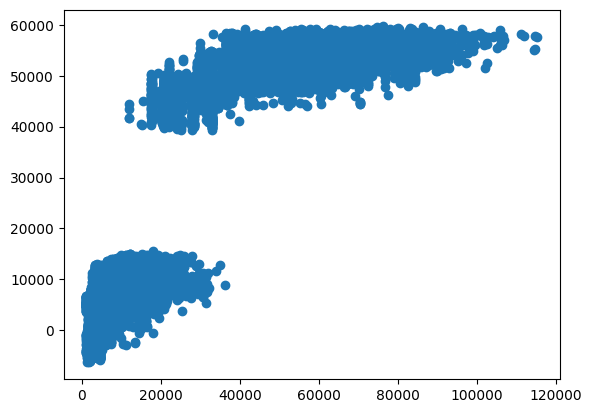

In [26]:
plt.scatter(test_y, lr.predict(test_df))

In [27]:
from sklearn.metrics import r2_score
r2_score(test_y, lr.predict(test_df))

0.9045747367508341

In [28]:
from scipy import stats
from scipy.stats import t
confidence = 0.95
se = (test_y - lr.predict(test_df)) ** 2
t.interval(0.95, len(se - 1), loc=se.mean(), scale=stats.sem(se))

(np.float64(48103771.710970566), np.float64(50276291.60020584))

In [29]:
test_y

array([ 7366, 64831,  6195, ...,  6734,  5082, 66465])

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(test_df)

rmse = np.sqrt(mean_squared_error(test_y, y_pred))

print("RMSE:", rmse)

RMSE: 7013.560554781587


In [31]:
sample_indices = np.random.choice(test_df.shape[0], 5, replace=False)

y_pred_sample = lr.predict(test_df[sample_indices])

y_true_sample = test_y[sample_indices]

for i in range(5):
    print(f"Actual: {y_true_sample[i]}, Predicted: {y_pred_sample[i]}")


Actual: 5206, Predicted: 8779.739616944295
Actual: 43376, Predicted: 53832.99309575235
Actual: 4799, Predicted: 4174.230220933481
Actual: 51697, Predicted: 53305.57484658154
Actual: 5656, Predicted: 9619.33688562308
